# Bagian Baru

In [1]:
import pandas as pd
import numpy as np

In [2]:
!dir

sample_data  test.csv  train.csv


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Visualisai

## Chart

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
count_sex = train['Sex'].value_counts()

index_sex = count_sex.index
values_sex = count_sex.values

In [9]:
values_sex

array([577, 314])

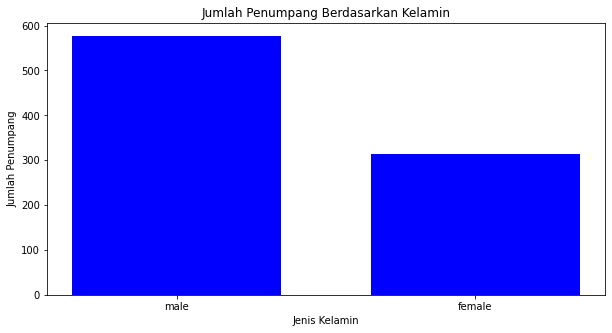

In [10]:
fig = plt.figure(figsize = (10, 5))
plt.bar(index_sex, values_sex, color = 'blue', width = 0.7)

plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.title('Jumlah Penumpang Berdasarkan Kelamin')

plt.show()

In [11]:
def barchart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10, 5))
  plt.bar(index, values, color = 'maroon', width = 0.7)

  plt.show()

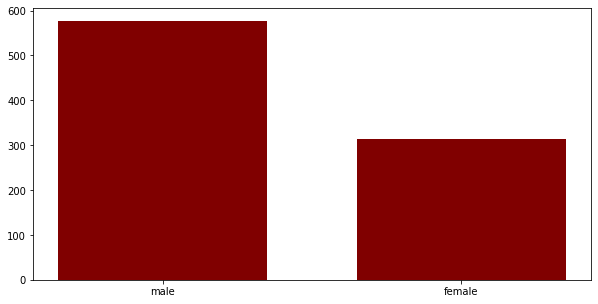

In [12]:
barchart('Sex')

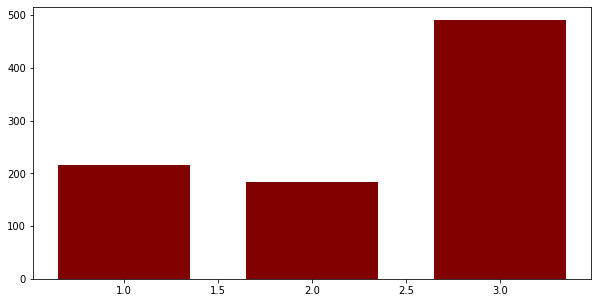

In [13]:
barchart('Pclass')

## Grouped Barchart

In [14]:
survived = train.groupby(['Survived', 'Sex']).count()['PassengerId'].reset_index()

In [15]:
survived

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


In [16]:
def grouped_barchart(column):
  survived = train.groupby(['Survived', column]).count()['PassengerId'].reset_index()

  g = sns.catplot(
      data = survived, kind = 'bar',
      x = 'Survived', y = 'PassengerId', hue = column,
      palette = 'dark', height = 6
  )

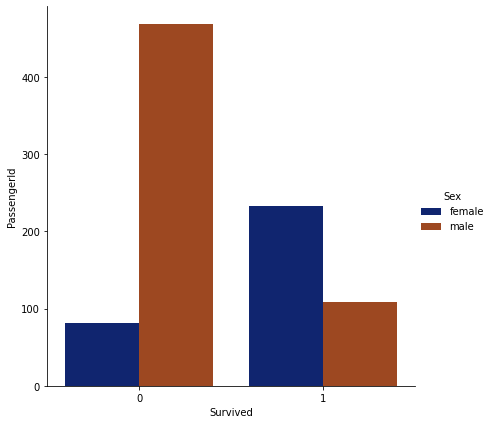

In [17]:
grouped_barchart('Sex')

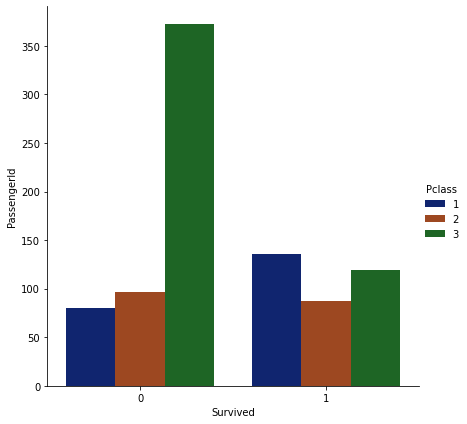

In [18]:
grouped_barchart('Pclass')

## Histogram

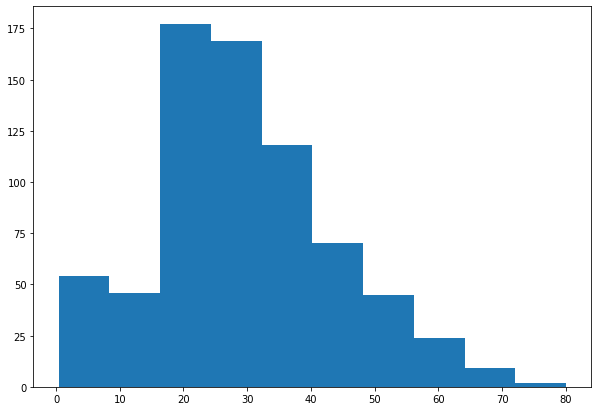

In [19]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(train.Age)

plt.show()

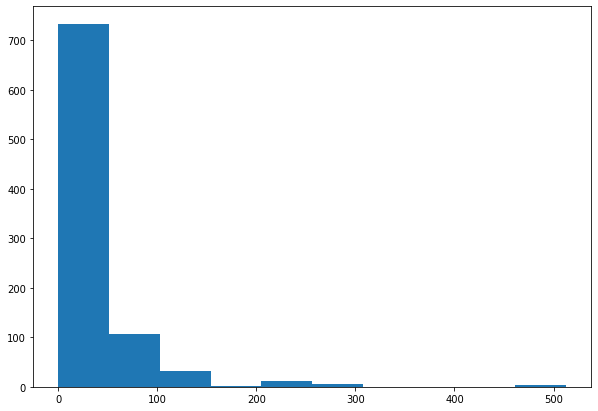

In [20]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(train.Fare)

plt.show()

## KDE Plot

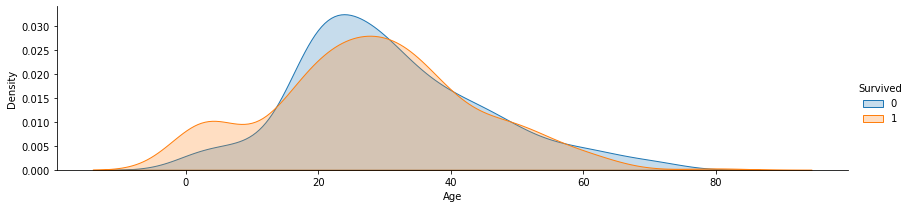

In [21]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.add_legend()
plt.show()

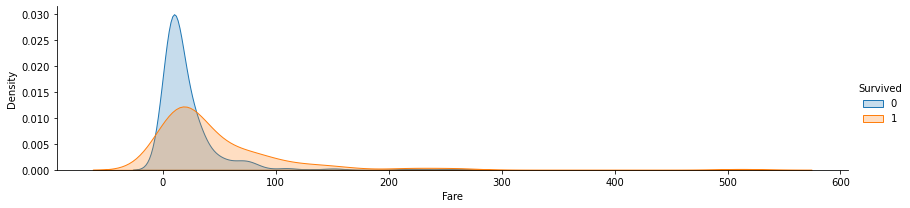

In [22]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.add_legend()
plt.show()

# Prepocessing Data

## mengisi missing value

In [23]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
modus_embarked = train['Embarked'].mode()[0] 

In [26]:
train['Embarked'] = train['Embarked'].fillna(modus_embarked)

In [27]:
mean_age = train['Age'].mean()
mean_age

29.69911764705882

In [28]:
train['Age'] = train['Age'].fillna(mean_age)

In [29]:
mean_age_test = test['Age'].mean()
mean_age_test

30.272590361445783

In [30]:
test['Age'] = test['Age'].fillna(mean_age_test)

In [31]:
mean_fare = test['Fare'].mean()
test['Fare'] = test['Fare'].fillna(mean_fare)

### dropp cabin karena terlalu banyak missing value

In [32]:
train = train.drop(['Cabin'], axis = 1 )
test = test.drop(['Cabin'], axis = 1 )

In [33]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Converting data to numeric

### Convert Data Sex

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
sex_mapping = {'male' : 1, 'female': 0}

train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [37]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


### Convert Data Embarked

In [39]:
embarked = train[['Embarked']]
dummies = pd.get_dummies(embarked)

dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [40]:
train = pd.merge(train.reset_index(), dummies.reset_index())
train.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,0,1


In [41]:
train = train.drop(['index', 'Embarked'], axis = 1)

In [42]:
embarked_test = test[['Embarked']]
dummies_test = pd.get_dummies(embarked_test)

dummies_test.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [43]:
test = pd.merge(test.reset_index(), dummies_test.reset_index())
test.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,0,1,0
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,0,0,1
2,2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,0,1,0
3,3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,0,0,1
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,0,0,1


In [44]:
test = test.drop(['index', 'Embarked'], axis = 1)

In [47]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0,1


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked_C   418 non-null    uint8  
 10  Embarked_Q   418 non-null    uint8  
 11  Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 33.9+ KB


### Extraxt data title

In [49]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.' , expand = False)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,Mr


In [51]:
title_mapping = {'Mr': 0,
                 'Miss': 1,
                 'Mrs': 2,
                 'Master': 3, 'Dr': 3, 'Rev': 3, 'Col': 3, 'Major': 3, 'Mlle': 3, 'Countess': 3,
                 'Ms': 3, 'Lady': 3, 'Jonkheer': 3, 'Don': 3, 'Dona': 3, 'Mme': 3, 'Capt': 3, 'Sir': 3}

train['Title'] = train['Title'].map(title_mapping)

In [52]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.' , expand = False)

In [53]:
test['Title'] = test['Title'].map(title_mapping)

### select column

In [54]:
train = train.drop(['PassengerId','Name', 'Ticket'], axis=1)
test_id = test[['PassengerId']]

test= test.drop(['PassengerId','Name', 'Ticket'], axis=1)

In [55]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,1,34.5,0,0,7.8292,0,1,0,0
1,3,0,47.0,1,0,7.0000,0,0,1,2
2,2,1,62.0,0,0,9.6875,0,1,0,0
3,3,1,27.0,0,0,8.6625,0,0,1,0
4,3,0,22.0,1,1,12.2875,0,0,1,2


In [56]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,1,22.0,1,0,7.2500,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,2
2,1,3,0,26.0,0,0,7.9250,0,0,1,1
3,1,1,0,35.0,1,0,53.1000,0,0,1,2
4,0,3,1,35.0,0,0,8.0500,0,0,1,0


# Modelling

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [58]:
train.shape, test.shape

((891, 11), (418, 10))

In [59]:
train_data = train.drop("Survived",axis = 1 )
target = train['Survived']

In [60]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78212291 0.78651685 0.78089888 0.8258427  0.82022472]


In [61]:
score.mean()

0.7991212102190698

In [62]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.73184358 0.79775281 0.78651685 0.78651685 0.75842697]


In [63]:
score.mean()

0.7722114117130123

# Prediction

In [64]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,1,34.5,0,0,7.8292,0,1,0,0
1,3,0,47.0,1,0,7.0000,0,0,1,2
2,2,1,62.0,0,0,9.6875,0,1,0,0
3,3,1,27.0,0,0,8.6625,0,0,1,0
4,3,0,22.0,1,1,12.2875,0,0,1,2


In [65]:
clf = GaussianNB()
clf.fit(train_data, target)

GaussianNB()

In [67]:
prediction = clf.predict(test)

In [68]:
df_test = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": prediction
    })
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [71]:
submission.to_csv("belajar_hasbi.csv", index = False)

In [72]:
test['Survived'] = submission['Survived']
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,Survived
0,3,1,34.5,0,0,7.8292,0,1,0,0,0
1,3,0,47.0,1,0,7.0000,0,0,1,2,1
2,2,1,62.0,0,0,9.6875,0,1,0,0,0
3,3,1,27.0,0,0,8.6625,0,0,1,0,0
4,3,0,22.0,1,1,12.2875,0,0,1,2,1
